# Afonichev Demid SSE2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ts_conf = pd.read_csv('data/covid_confirmed.csv')
ts_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24


In [3]:
df_conf = ts_conf.drop(columns=['Lat', 'Long']) \
                 .set_index(['Province/State', 'Country/Region']) \
                 .stack() \
                 .reset_index(name='value') \
                 .rename(columns={'level_2':'date'})
df_conf.head()

,Province/State,Country/Region,date,value
0,NaN,Afghanistan,1/22/20,0
1,NaN,Afghanistan,1/23/20,0
2,NaN,Afghanistan,1/24/20,0
3,NaN,Afghanistan,1/25/20,0
4,NaN,Afghanistan,1/26/20,0


In [4]:
df_conf['date'] = pd.to_datetime(df_conf['date'], format="%m/%d/%y")

In [5]:
df_conf['new'] = df_conf.value
df_conf.new = df_conf.new - df_conf.new.shift(1)
df_conf.new = df_conf.new.fillna(0)
df_conf.loc[df_conf.new < 0, 'new'] = 0
df_conf.head()

,Province/State,Country/Region,date,value,new
0,NaN,Afghanistan,2020-01-22,0,0.0
1,NaN,Afghanistan,2020-01-23,0,0.0
2,NaN,Afghanistan,2020-01-24,0,0.0
3,NaN,Afghanistan,2020-01-25,0,0.0
4,NaN,Afghanistan,2020-01-26,0,0.0


In [6]:
df_conf = df_conf.groupby(['Country/Region', 'date']).sum().reset_index()
df_conf.head()

,Country/Region,date,value,new
0,Afghanistan,2020-01-22,0,0.0
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0


## Task 1. Compute statistics of total number of cases on the 10’th day since 50 confirmed cases:
-  Mean
-  Median
-  Max
-  Min

In [7]:
df_conf_50p = df_conf[df_conf.value >= 50]
df_conf_50p.head()

,Country/Region,date,value,new
62,Afghanistan,2020-03-24,74,34.0
63,Afghanistan,2020-03-25,84,10.0
64,Afghanistan,2020-03-26,94,10.0
65,Afghanistan,2020-03-27,110,16.0
66,Afghanistan,2020-03-28,110,0.0


In [8]:
conf50p_day_10 = df_conf_50p.groupby(['Country/Region']).nth(9).reset_index()
conf50p_day_10

,Country/Region,date,value,new
0,Afghanistan,2020-04-02,273,36.0
1,Albania,2020-03-25,146,23.0
2,Algeria,2020-03-25,302,38.0
3,Andorra,2020-03-28,308,41.0
4,Argentina,2020-03-25,387,0.0
...,...,...,...,...
126,Uruguay,2020-03-27,238,21.0
127,Uzbekistan,2020-04-02,205,24.0
128,Venezuela,2020-03-30,135,16.0
129,Vietnam,2020-03-23,123,10.0


In [9]:
print(f'mean   = {conf50p_day_10.value.mean():.2f}')
print(f'median = {conf50p_day_10.value.median():.2f}')
print(f'max    = {conf50p_day_10.value.max():.2f}')
print(f'min    = {conf50p_day_10.value.min():.2f}')

mean   = 526.74
median = 261.00
max    = 9802.00
min    = 55.00


## Task 2. Compute statistics of total number of deaths on last available day:
- Mean 
- Median 
- Max 
- Min

In [10]:
ts_death = pd.read_csv('data/covid_deaths.csv')
ts_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,15,18,18,21,23,25,30,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,23,24,25,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,235,256,275,293,313,326,336,348,364,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,25,26,26,29,29,31,33,33,35,35
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [11]:
df_death = ts_death.drop(columns=['Lat', 'Long']) \
                   .set_index(['Province/State', 'Country/Region']) \
                   .stack() \
                   .reset_index(name='value') \
                   .rename(columns={'level_2':'date'})
df_death.head()

,Province/State,Country/Region,date,value
0,NaN,Afghanistan,1/22/20,0
1,NaN,Afghanistan,1/23/20,0
2,NaN,Afghanistan,1/24/20,0
3,NaN,Afghanistan,1/25/20,0
4,NaN,Afghanistan,1/26/20,0


In [12]:
df_death['date'] = pd.to_datetime(df_death['date'], format="%m/%d/%y")

In [13]:
df_death = df_death.groupby(['Country/Region', 'date']).sum().reset_index()
df_death.head()

,Country/Region,date,value
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [14]:
death_last_day = df_death.groupby(['Country/Region']).last().reset_index()
death_last_day.head()

,Country/Region,date,value
0,Afghanistan,2020-04-18,30
1,Albania,2020-04-18,26
2,Algeria,2020-04-18,367
3,Andorra,2020-04-18,35
4,Angola,2020-04-18,2


In [15]:
print(f'mean   = {death_last_day.value.mean():.2f}')
print(f'median = {death_last_day.value.median():.2f}')
print(f'max    = {death_last_day.value.max():.2f}')
print(f'min    = {death_last_day.value.min():.2f}')

mean   = 862.21
median = 9.00
max    = 38664.00
min    = 0.00


## Task 3. What was the average number of new cases for the last 10 days in Germany?

In [16]:
conf_last_10days = df_conf.groupby(['Country/Region']).tail(10)
conf_last_10days.head()

,Country/Region,date,value,new
78,Afghanistan,2020-04-09,484,40.0
79,Afghanistan,2020-04-10,521,37.0
80,Afghanistan,2020-04-11,555,34.0
81,Afghanistan,2020-04-12,607,52.0
82,Afghanistan,2020-04-13,665,58.0


In [17]:
conf_last_10days[conf_last_10days['Country/Region'] == 'Germany'].new.mean()

3004.6

## Task 4. Compute case fatality rate (death to total cases ratio) for the last available day in countries with more than 10 000 reported cases (in total). 
- What is the biggest case fatality rate? Write percentage rounded to 2 decimal places.
- What is the lowest? Write percentage rounded to 2 decimal places.
- Plot a scatter plot: Total number of cases vs Case fatality rate, color points according to the country.

In [18]:
conf_to_death = df_conf.merge(df_death, on=['Country/Region', 'date'],
                              suffixes=('_conf', '_death'))
conf_to_death.head()

,Country/Region,date,value_conf,new,value_death
0,Afghanistan,2020-01-22,0,0.0,0
1,Afghanistan,2020-01-23,0,0.0,0
2,Afghanistan,2020-01-24,0,0.0,0
3,Afghanistan,2020-01-25,0,0.0,0
4,Afghanistan,2020-01-26,0,0.0,0


In [19]:
conf_to_death_last_day = conf_to_death.groupby(['Country/Region']).last().reset_index()
conf_to_death_last_day.head()

,Country/Region,date,value_conf,new,value_death
0,Afghanistan,2020-04-18,933,27.0,30
1,Albania,2020-04-18,548,9.0,26
2,Algeria,2020-04-18,2534,116.0,367
3,Andorra,2020-04-18,704,8.0,35
4,Angola,2020-04-18,24,5.0,2


In [20]:
conf_to_death_last_day = conf_to_death_last_day[conf_to_death_last_day['value_conf'] >= 10000]
conf_to_death_last_day.head()

,Country/Region,date,value_conf,new,value_death
9,Austria,2020-04-18,14671,76.0,443
16,Belgium,2020-04-18,37183,1045.0,5453
23,Brazil,2020-04-18,36658,2976.0,2354
32,Canada,2020-04-18,34355,1542.0,1399
36,China,2020-04-18,83787,27.0,4636


In [21]:
conf_to_death_last_day['fatality_rate'] = conf_to_death_last_day.value_death / conf_to_death_last_day.value_conf
conf_to_death_last_day.head()

,Country/Region,date,value_conf,new,value_death,fatality_rate
9,Austria,2020-04-18,14671,76.0,443,0.030196
16,Belgium,2020-04-18,37183,1045.0,5453,0.146653
23,Brazil,2020-04-18,36658,2976.0,2354,0.064215
32,Canada,2020-04-18,34355,1542.0,1399,0.040722
36,China,2020-04-18,83787,27.0,4636,0.055331


In [22]:
print(f'max = {conf_to_death_last_day.fatality_rate.max() * 100:.2f}%')
print(f'min = {conf_to_death_last_day.fatality_rate.min() * 100:.2f}%')

max = 14.67%
min = 0.85%


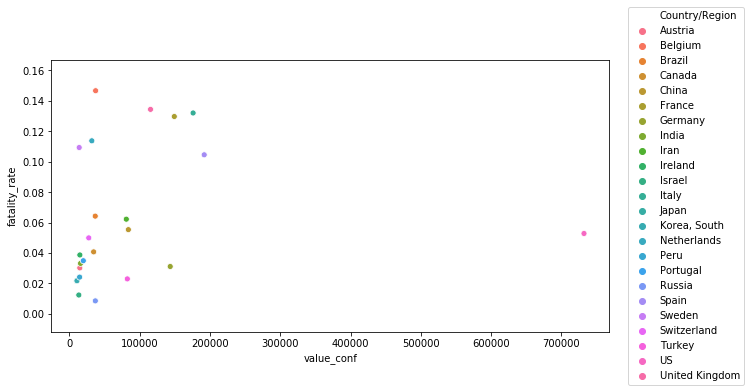

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='value_conf', y='fatality_rate', hue='Country/Region', data=conf_to_death_last_day) \
   .legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

## Task 5. On which weekday most cases were reported in France on average? On which weekday least cases were reported in Italy on average?

In [24]:
def get_weekday(date):
    return 

In [25]:
df_conf['day'] = df_conf.apply(lambda row: row.date.strftime('%A'), axis=1)
df_conf.head()

,Country/Region,date,value,new,day
0,Afghanistan,2020-01-22,0,0.0,Wednesday
1,Afghanistan,2020-01-23,0,0.0,Thursday
2,Afghanistan,2020-01-24,0,0.0,Friday
3,Afghanistan,2020-01-25,0,0.0,Saturday
4,Afghanistan,2020-01-26,0,0.0,Sunday


In [26]:
country_weekday = df_conf.groupby(by=['Country/Region', 'day']).mean().reset_index()
country_weekday.head()

,Country/Region,day,value,new
0,Afghanistan,Friday,142.384615,9.923077
1,Afghanistan,Monday,105.750000,11.000000
2,Afghanistan,Saturday,148.769231,6.384615
3,Afghanistan,Sunday,94.750000,11.333333
4,Afghanistan,Thursday,132.461538,10.923077


In [27]:
france_weekday = country_weekday[country_weekday['Country/Region'] == 'France']
france_weekday

,Country/Region,day,value,new
427,France,Friday,27435.384615,1462.153846
428,France,Monday,22847.250000,1521.000000
429,France,Saturday,28590.692308,1155.384615
430,France,Sunday,21326.416667,2782.250000
431,France,Thursday,25973.230769,1915.923077
432,France,Tuesday,24644.416667,1797.166667
433,France,Wednesday,24057.307692,1308.615385


In [28]:
france_weekday[france_weekday.new == max(france_weekday.new)]

,Country/Region,day,value,new
430,France,Sunday,21326.416667,2782.25


In [29]:
italy_weekday = country_weekday[country_weekday['Country/Region'] == 'Italy']
italy_weekday

,Country/Region,day,value,new
588,Italy,Friday,45889.923077,2319.461538
589,Italy,Monday,41429.500000,1753.083333
590,Italy,Saturday,48239.692308,2349.769231
591,Italy,Sunday,39676.416667,2077.166667
592,Italy,Thursday,43570.461538,1934.923077
593,Italy,Tuesday,43127.416667,1697.916667
594,Italy,Wednesday,41635.538462,1825.615385


In [30]:
italy_weekday[italy_weekday.new == min(italy_weekday.new)]

,Country/Region,day,value,new
593,Italy,Tuesday,43127.416667,1697.916667
